In [1]:
import xarray as xr
import numpy as np
import functions
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
rpath = '/nird/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.sst.blom.concatfiles.nc')
ds_2xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.sst.blom.concatfiles.nc')
ds_4xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.sst.blom.concatfiles.nc')

Text(0.5, 0, '$\\Delta Sea Surface Temperature, K$')

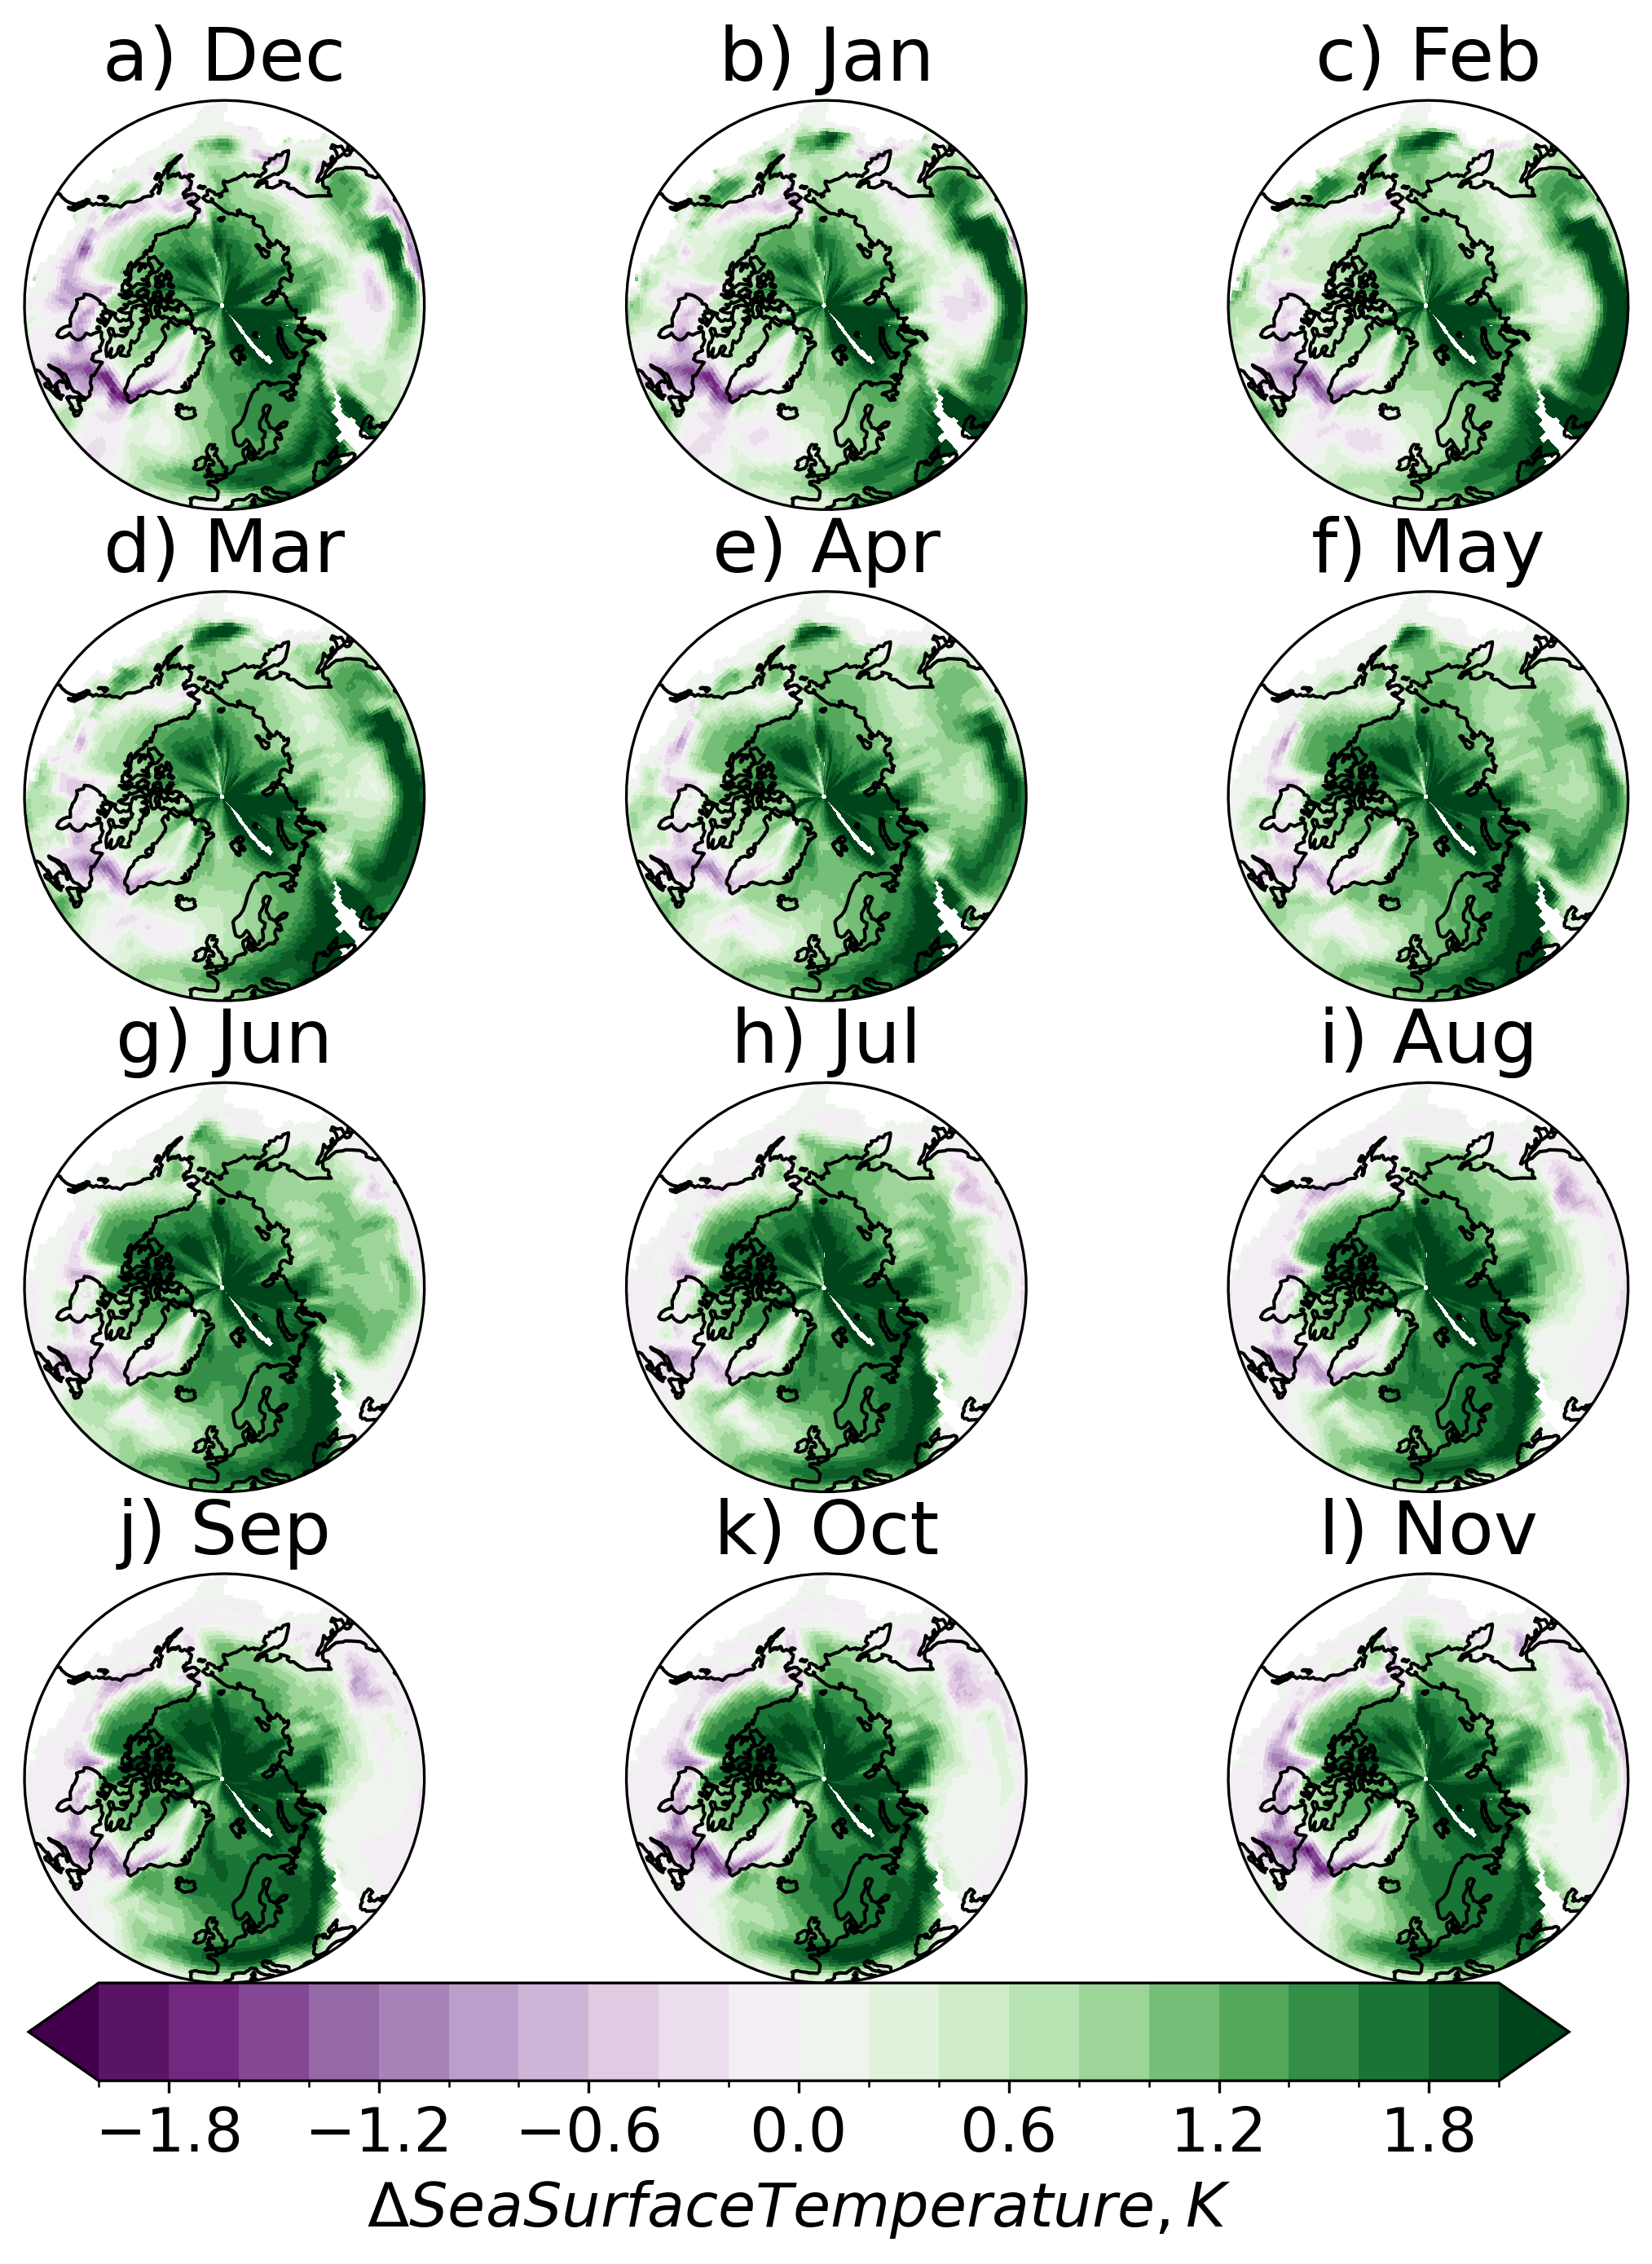

In [6]:
var = "sst"
tslice = slice('2040-01-01', '2069-12-31')
ds_slice_piClim = ds_piClim.sel(time=tslice)
ds_slice_4xCO2 = ds_4xCO2.sel(time=tslice)
lim = 2
levels = np.linspace(-lim, lim, 21)
unit = '$\Delta Sea Surface Temperature, K$'

ds_piClim_m = ds_slice_piClim.groupby(ds_slice_piClim.time.dt.month).mean('time')
ds_4xCO2_m = ds_slice_4xCO2.groupby(ds_slice_4xCO2.time.dt.month).mean('time')

# Set the projection to use for plotting
fig,axs = plt.subplots(nrows=4, ncols=3, figsize=[9,10],dpi=300,  subplot_kw={'projection':ccrs.Orthographic(0, 90)})

months = [[12, 1, 2], 
        [3, 4, 5], 
        [6, 7, 8], 
        [9, 10, 11]]

month_names = [['Dec', 'Jan', 'Feb'], 
        ['Mar', 'Apr', 'May'], 
        ['Jun', 'Jul', 'Aug'], 
        ['Sep', 'Oct', 'Nov']]

labels = [['a)', 'b)', 'c)'], 
        ['d)', 'e)', 'f)'], 
        ['g)', 'h)', 'i)'], 
        ['j)', 'k)', 'l)']]

for row in range(4):
    for col in range(3):
        ax = axs[row][col]
        month = months[row][col]

        functions.polarCentral_set_latlim([40,90], ax)
        data = ds_4xCO2_m[var].sel(month=month) - ds_piClim_m[var].sel(month=month) 
        map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='PRGn', levels=levels,
                                        add_colorbar=False)
        ax.set_title(labels[row][col]+' '+month_names[row][col], fontsize=22)   
        ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel(unit, fontsize=18)